# Лабораторна робота №4

Виконав студент 3 курсу
групи КА-02
Шинкарьов О.О.

Перевірила Недашківська Н.І.

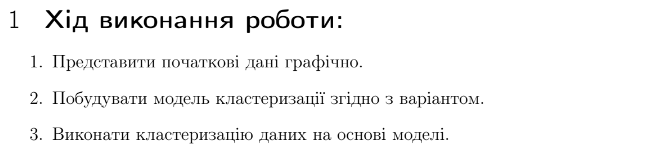

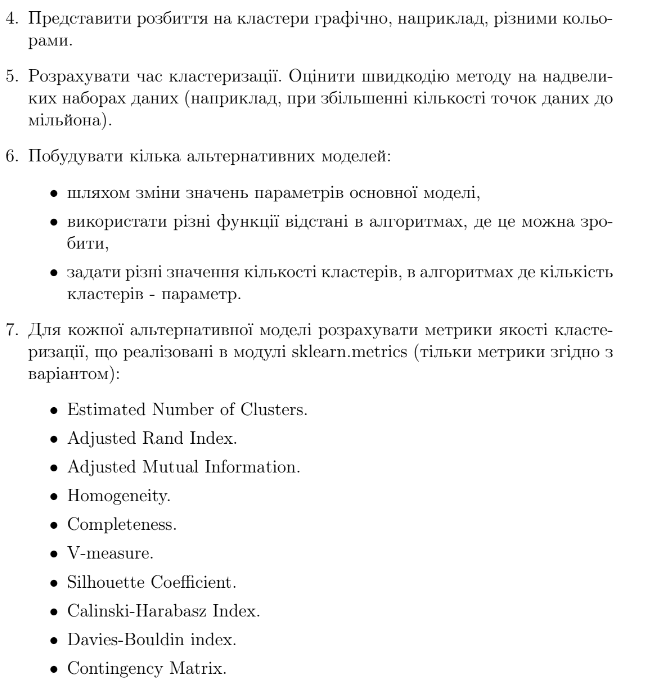

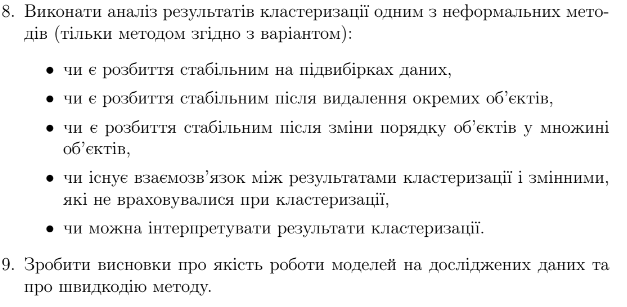

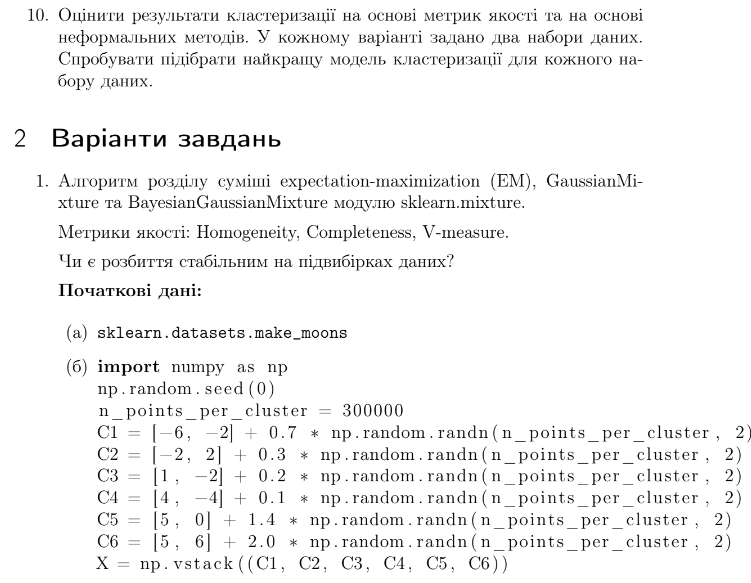

In [1]:
#імпорт необхідних бібліотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%precision 2
np.set_printoptions(suppress=True)
from copy import deepcopy

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

## 1 датасет

### Препроцесінг і візуалізація

In [3]:
from sklearn.datasets import make_moons

In [4]:
#генерація make_moons з шумом 0.1
data = make_moons(n_samples=1000, noise=0.1)
moons = pd.DataFrame(data[0], columns = ['x1','x2'])
true_labels = data[1]

In [5]:
moons

,x1,x2
0,0.428174,-0.290461
1,0.214806,0.990461
2,0.873755,0.656320
3,0.528774,-0.344343
4,0.626223,-0.490541
...,...,...
995,1.249510,-0.652790
996,1.748919,0.513563
997,0.929258,0.635828
998,0.817677,-0.690151


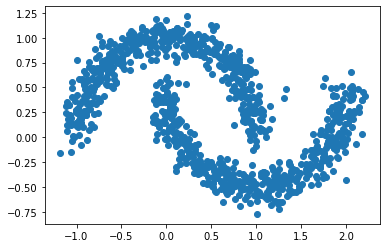

In [6]:
#візуалізація датасету moons у вигляді точкового графіку
plt.scatter(moons.x1, moons.x2);

In [7]:
#функції для візуалізації проведеної кластеризації та підрахунку метрик на датасеті moons

def plot_clusterization_for_moons(moons_model, moons_dataset):
    predict_values = moons_model.predict(moons_dataset)
    temp_moons = deepcopy(moons_dataset)
    temp_moons['predict_value'] = predict_values
    plt.scatter(temp_moons.x1, temp_moons.x2, c = temp_moons.predict_value)
    plt.show()
    
def metrics_for_moons(moons_model):
    print('Homogenity   score: ', homogeneity_score(true_labels, moons_model.predict(moons)))
    print('Completeness score: ', completeness_score(true_labels, moons_model.predict(moons)))
    print('V-measure    score: ', v_measure_score(true_labels, moons_model.predict(moons)))

### Побудова моделей кластеризації

Візуально бачимо, що у нас 2 кластери, тому будемо намагатися побудувати модель, що буде "правильно" кластеризувати вхідні дані

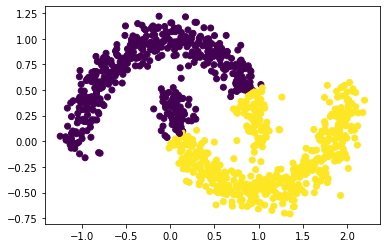

In [28]:
moonsGM = GaussianMixture(n_components=2, random_state=1)
moonsGM.fit(moons)
plot_clusterization_for_moons(moonsGM, moons)

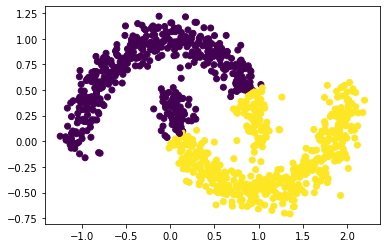

In [29]:
moonsBGM = GaussianMixture(n_components=2, random_state=1)
moonsBGM.fit(moons)
plot_clusterization_for_moons(moonsBGM, moons)

Бачимо, що моделі кластеризували датасет приблизно однаково, однак їм забракло точності

### Перевірка швидкодії моделей на великих обсягах даних

In [10]:
big_moons = pd.DataFrame(make_moons(1000000, noise=0.05)[0], columns = ['x1','x2'] )

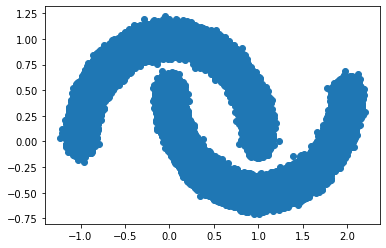

In [11]:
plt.scatter(big_moons.x1, big_moons.x2);

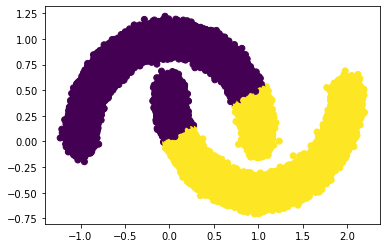

Wall time: 19.8 s


In [30]:
%%time
big_moonsGM = GaussianMixture(n_components=2)
big_moonsGM.fit(big_moons)
plot_clusterization_for_moons(big_moonsGM, big_moons)

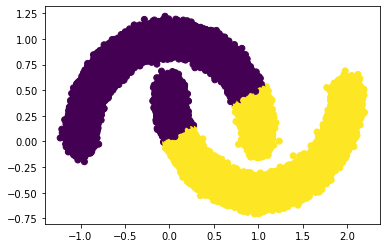

Wall time: 19.2 s


In [32]:
%%time
big_moonsBGM = BayesianGaussianMixture(n_components=2)
big_moonsBGM.fit(big_moons)
plot_clusterization_for_moons(big_moonsBGM, big_moons)

Бачимо, що на великих і малих обсягах даних точність кластеризування приблизно однакова, та алгоритми доволі швидкі навіть на великих обсягах

### Побудова альтернативних моделей

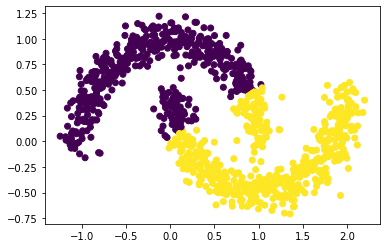

In [33]:
alt1_moonsGM = GaussianMixture(n_components=2, tol = 1e-5, reg_covar=1e-10, random_state=1)
alt1_moonsGM.fit(moons)
plot_clusterization_for_moons(alt1_moonsGM, moons)

In [34]:
metrics_for_moons(alt1_moonsGM)

Homogenity   score:  0.39055960220808894
Completeness score:  0.390721961275794
V-measure    score:  0.3906407648719242


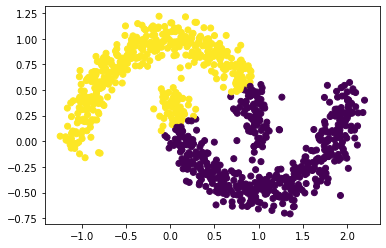

In [35]:
alt1_moonsBGM = BayesianGaussianMixture(n_components=2, n_init=10, max_iter=1000, init_params='k-means++', random_state=1)
alt1_moonsBGM.fit(moons)
plot_clusterization_for_moons(alt1_moonsBGM, moons)

In [21]:
metrics_for_moons(alt1_moonsBGM)

Homogenity   score:  0.40255753881823375
Completeness score:  0.4034707260786886
V-measure    score:  0.40301361515210266


Враховуючи низьку точність моделей, не будемо намагатися підібрати гіперпараметри, хіба що змінимо кількість компонентів кластеризації

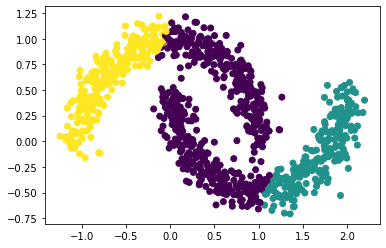

In [36]:
alt2_moonsGM = GaussianMixture(n_components=3, random_state=1)
alt2_moonsGM.fit(moons)
plot_clusterization_for_moons(alt2_moonsGM, moons)

In [37]:
metrics_for_moons(alt2_moonsGM)

Homogenity   score:  0.47503435040121705
Completeness score:  0.32245989809480635
V-measure    score:  0.38415205754972354


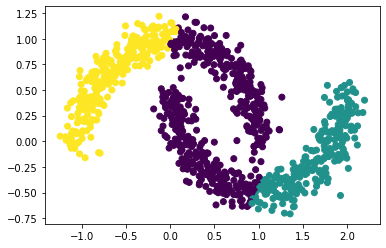

In [38]:
alt2_moonsBGM = BayesianGaussianMixture(n_components=3, random_state=1)
alt2_moonsBGM.fit(moons)
plot_clusterization_for_moons(alt2_moonsBGM, moons)

Бачимо, що хоч змін у метриках особливо непомітно, проте модель більш влучно стала вловлювати паттерни, закладені в датасеті. Спробуємо суттєво збільшити кількість компонентів для кластеризації

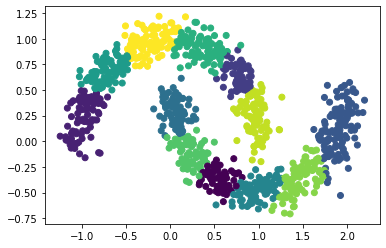

In [48]:
alt3_moonsGM = GaussianMixture(n_components=12, random_state=1)
alt3_moonsGM.fit(moons)
plot_clusterization_for_moons(alt3_moonsGM, moons)

In [49]:
metrics_for_moons(alt3_moonsGM)

Homogenity   score:  0.9919798827222088
Completeness score:  0.27903586048727747
V-measure    score:  0.43555394437917494


Бачимо, що завдяки такому рішенню ми змогли майже максимізувати метрику Homogenity. Тепер, якщо будемо розглядати наше зображення датасету, як 4 гілки параболи, то спробуємо побудувати таку модель дя кластеризації.

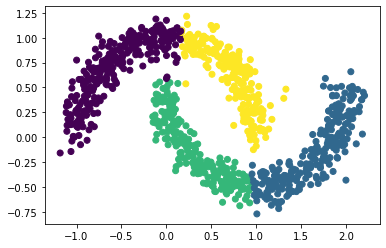

In [9]:
alt3_moonsBGM = BayesianGaussianMixture(n_components=4, random_state=1)
alt3_moonsBGM.fit(moons)
plot_clusterization_for_moons(alt3_moonsBGM, moons)

In [10]:
metrics_for_moons(alt3_moonsBGM)

Homogenity   score:  0.9736260181200397
Completeness score:  0.48808677809862394
V-measure    score:  0.6502152645670805


Це найкращі метрики, які ми змогли отримати, тому кластеризацію на підвибірках проведемо, уважаючи, що у нас 4 кластери

### Кластеризація на підвибірках

In [12]:
moons_05 = moons[480:980]

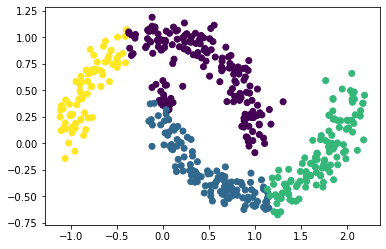

In [13]:
moons_05_GM = GaussianMixture(n_components=4, random_state=1)
moons_05_GM.fit(moons_05)
plot_clusterization_for_moons(moons_05_GM, moons_05)

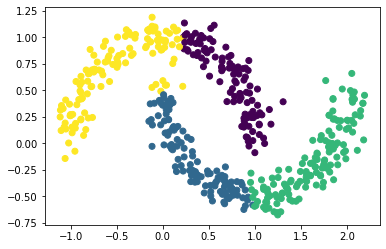

In [14]:
moons_05_BGM = BayesianGaussianMixture(n_components=4, random_state=1)
moons_05_BGM.fit(moons_05)
plot_clusterization_for_moons(moons_05_BGM, moons_05)

In [16]:
moons_025 = moons[5:255]

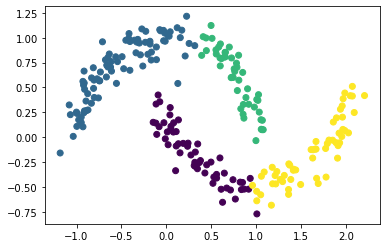

In [17]:
moons_025_GM = GaussianMixture(n_components=4, random_state=1)
moons_025_GM.fit(moons_025)
plot_clusterization_for_moons(moons_025_GM, moons_025)

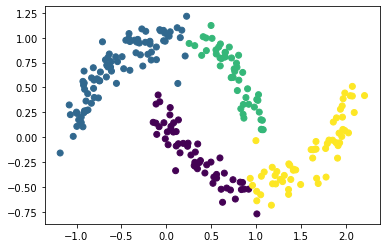

In [18]:
moons_025_BGM = BayesianGaussianMixture(n_components=4, random_state=1)
moons_025_BGM.fit(moons_025)
plot_clusterization_for_moons(moons_025_BGM, moons_025)

In [19]:
moons_01 = moons[260:360]

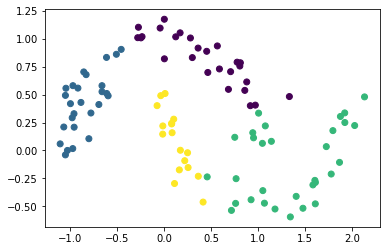

In [20]:
moons_01_GM = GaussianMixture(n_components=4, random_state=1)
moons_01_GM.fit(moons_01)
plot_clusterization_for_moons(moons_01_GM, moons_01)

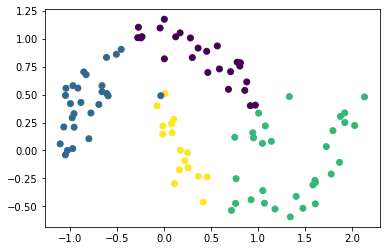

In [21]:
moons_01_BGM = BayesianGaussianMixture(n_components=4, random_state=1)
moons_01_BGM.fit(moons_01)
plot_clusterization_for_moons(moons_01_BGM, moons_01)

В цьому модулі ми взяли 3 не пересічних між собою датасети, що є підвибірками вихідного датасету, розмірами 0.1, 0.25 і 0.5 відносно вихідного датасету. Бачимо, що тільки при найменшому розмірі датасету, модель втратила здатність вдало кластеризувати об'єкти

## 2 датасет

### Препроцесінг і візуалізація

In [22]:
import numpy as np
np.random.seed(0)
n_points_per_cluster = 300000
C1 = [-6 , -2] + 0.7 * np.random.randn(n_points_per_cluster, 2)
C2 = [-2 , 2] + 0.3 * np.random.randn (n_points_per_cluster, 2)
C3 = [1 , -2] + 0.2 * np.random.randn (n_points_per_cluster, 2)
C4 = [4 , -4] + 0.1 * np.random.randn (n_points_per_cluster, 2)
C5 = [5 , 0] + 1.4 * np.random.randn (n_points_per_cluster, 2)
C6 = [5 , 6] + 2.0 * np.random.randn (n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

In [25]:
X = pd.DataFrame(X)

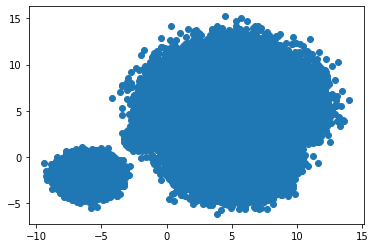

In [60]:
#візуалізація згенерованого масиву
plt.scatter(X[0], X[1]);

Бачимо, що по суті маємо тільки 2 кластери, які добре вирізняються на точковому графіку

In [27]:
def plot_clusterization_for_array(array_model, array):
    predict_values = array_model.predict(array)
    temp_array = deepcopy(array)
    temp_array['predict_value'] = predict_values
    plt.scatter(temp_array[0], temp_array[1], c = temp_array.predict_value)
    plt.show()

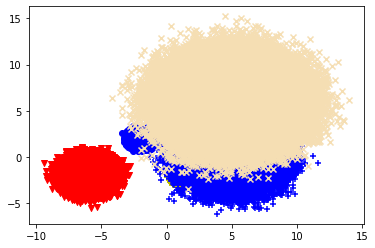

In [33]:
plt.scatter(C1[:, 0], C1[:, 1], marker='v', c='r');
plt.scatter(C2[:, 0], C2[:, 1], marker='o', c='b');
plt.scatter(C3[:, 0], C3[:, 1], marker='s', c='y');
plt.scatter(C4[:, 0], C4[:, 1], marker='p', c='g');
plt.scatter(C5[:, 0], C5[:, 1], marker='+', c='b');
plt.scatter(C6[:, 0], C6[:, 1], marker='x', c='wheat');

Бачимо, що один кластер формує С1, інший - С2, С3, С4, С5, С6. З таким розрахунком створемо функцію для обрахунку метрик та будемо кластеризувати наші дані

In [119]:
true_labels_arr1 = np.ones(n_points_per_cluster) 
true_labels_arr0 = np.zeros(n_points_per_cluster)
true_labels_arr = np.hstack((true_labels_arr1, true_labels_arr0, true_labels_arr0, true_labels_arr0, true_labels_arr0, true_labels_arr0))

In [86]:
def metrics_for_array(array_model):
    print('Homogenity   score: ', homogeneity_score(true_labels_arr, array_model.predict(X)))
    print('Completeness score: ', completeness_score(true_labels_arr, array_model.predict(X)))
    print('V-measure    score: ', v_measure_score(true_labels_arr, array_model.predict(X)))

### Побудова моделей кластеризації

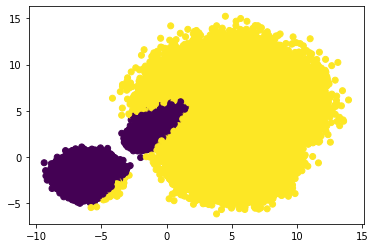

In [96]:
arrayGM = GaussianMixture(n_components=2, random_state=1)
arrayGM.fit(X)
plot_clusterization_for_array(arrayGM, X)

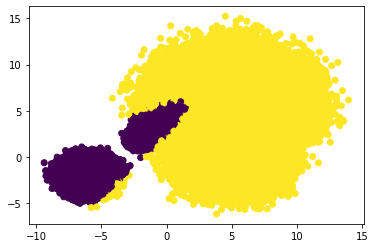

In [97]:
arrayBGM = BayesianGaussianMixture(n_components=2, random_state=1)
arrayBGM.fit(X)
plot_clusterization_for_array(arrayBGM, X)

Бачимо, що кластеризація є неточною. Спробуємо "підкрутити" гіперпараметри.

### Побудова альтернативних моделей та перевірка їх швидкодії

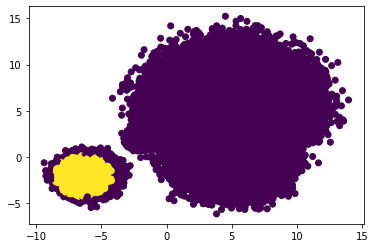

Wall time: 1min 17s


In [110]:
%%time
alt1_arrayGM = GaussianMixture(n_components=2, max_iter=10000, init_params='k-means++', random_state=1, covariance_type='spherical', n_init=10)
alt1_arrayGM.fit(X)
plot_clusterization_for_array(alt1_arrayGM, X)

In [120]:
metrics_for_array(alt1_arrayGM)

Homogenity   score:  0.968712046051356
Completeness score:  0.9757316860829556
V-measure    score:  0.9722091952592123


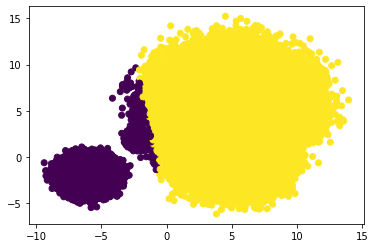

Wall time: 42.1 s


In [121]:
%%time
alt2_arrayGM = GaussianMixture(n_components=2, max_iter=10000, init_params='k-means++', random_state=1, covariance_type='tied', n_init=10)
alt2_arrayGM.fit(X)
plot_clusterization_for_array(alt2_arrayGM, X)

In [122]:
metrics_for_array(alt2_arrayGM)

Homogenity   score:  0.4876256247159449
Completeness score:  0.34527411081497644
V-measure    score:  0.4042851661540593


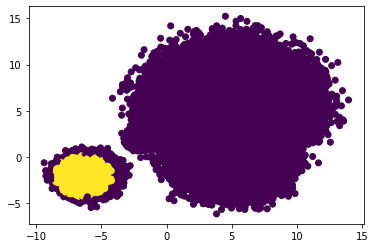

Wall time: 3min 2s


In [128]:
%%time
alt1_arrayBGM = BayesianGaussianMixture(n_components=2, max_iter=10000, init_params='k-means++', random_state=1, covariance_type='spherical', n_init=10, mean_precision_prior=0.5, weight_concentration_prior = 0.1)
alt1_arrayBGM.fit(X)
plot_clusterization_for_array(alt1_arrayBGM, X)

In [134]:
metrics_for_array(alt1_arrayBGM)

Homogenity   score:  0.9685410648726229
Completeness score:  0.9756047238331432
V-measure    score:  0.9720600621676116


Змогли отримати такі моделі, які видають нам високі метрики, проте на графіку помітно, що кластеризація є не до кінця вдалою. Спробуємо змінити кількість кластерів.

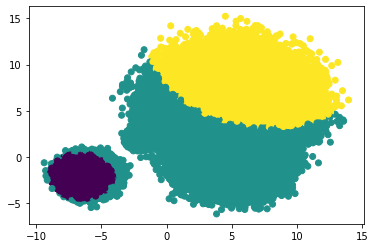

Wall time: 1min 2s


In [136]:
%%time
alt3_arrayGM = GaussianMixture(n_components=3, max_iter=10000, init_params='k-means++', random_state=1, covariance_type='spherical', n_init=10)
alt3_arrayGM.fit(X)
plot_clusterization_for_array(alt3_arrayGM, X)

In [137]:
metrics_for_array(alt3_arrayGM)

Homogenity   score:  0.9788645288099895
Completeness score:  0.535597008606735
V-measure    score:  0.6923608167113322


Згадаємо, що вихідний масив формувався з 6 згенерованих кластерів. Застосуємо це в наступних моделях

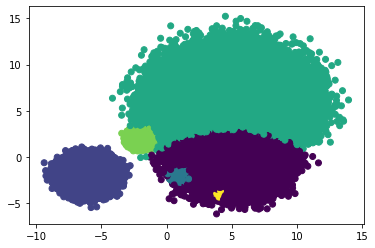

Wall time: 10min 3s


In [141]:
%%time
alt2_arrayBGM = BayesianGaussianMixture(n_components=6, max_iter=10000, init_params='k-means++', random_state=1, covariance_type='spherical', n_init=10, mean_precision_prior=0.5, weight_concentration_prior = 0.1)
alt2_arrayBGM.fit(X)
plot_clusterization_for_array(alt2_arrayBGM, X)

In [147]:
true_labels_arr1 = np.ones(n_points_per_cluster) 
true_labels_arr2 = np.full(n_points_per_cluster, 2)
true_labels_arr3 = np.full(n_points_per_cluster, 3) 
true_labels_arr4 = np.full(n_points_per_cluster, 4)
true_labels_arr5 = np.full(n_points_per_cluster, 5) 
true_labels_arr6 = np.full(n_points_per_cluster, 6)
true_labels_arr = np.hstack((true_labels_arr1, true_labels_arr2, true_labels_arr3, true_labels_arr4, true_labels_arr5, true_labels_arr6))

In [148]:
print('Homogenity   score: ', homogeneity_score(true_labels_arr, alt2_arrayBGM.predict(X)))
print('Completeness score: ', completeness_score(true_labels_arr, alt2_arrayBGM.predict(X)))
print('V-measure    score: ', v_measure_score(true_labels_arr, alt2_arrayBGM.predict(X)))

Homogenity   score:  0.9689525534093641
Completeness score:  0.9689717907874155
V-measure    score:  0.9689621720029069


Ми хоч і втратили в швидкодії алгоритму, проте змогли отримати майже точне розбиття на 6 вихідних кластерів

### Кластеризація на підвибірках

In [34]:
X_stratified = X[0:10000].append([X[300000:310000], X[600000:610000], X[900000:910000], X[1200000:1210000], X[1500000:1510000]],
                                ignore_index=True)

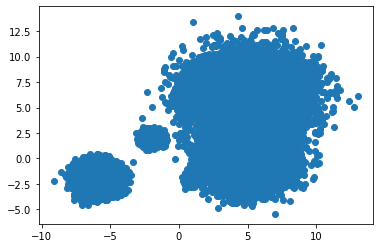

In [35]:
plt.scatter(X_stratified[0], X_stratified[1]);

Бачимо, що можна вирізнити 2-3 кластери візуально, та пам'ятаємо, що кластерів на виході було 6, тому на цих даних побудуємо моделі кластеризації для 2, 3 і 6 кластерів

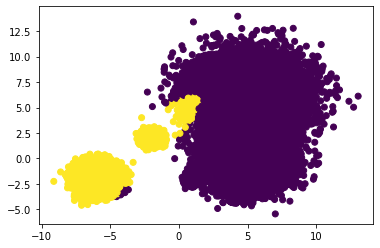

In [36]:
arrayGM_stratified = GaussianMixture(n_components=2, random_state=1)
arrayGM_stratified.fit(X_stratified)
plot_clusterization_for_array(arrayGM_stratified, X_stratified)

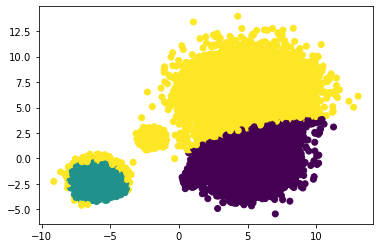

In [37]:
arrayBGM_stratified1 = BayesianGaussianMixture(n_components=3, random_state=1)
arrayBGM_stratified1.fit(X_stratified)
plot_clusterization_for_array(arrayBGM_stratified1, X_stratified)

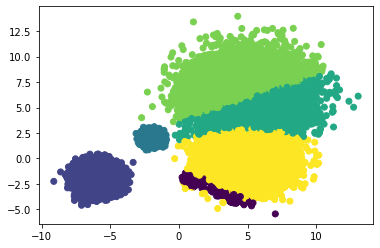

In [38]:
arrayBGM_stratified2 = BayesianGaussianMixture(n_components=6, random_state=1)
arrayBGM_stratified2.fit(X_stratified)
plot_clusterization_for_array(arrayBGM_stratified2, X_stratified)

Бачимо, що алгоритм суттєво втратив здібність правильно кластеризувати дані, проте це може свідчити не про неможливість його узагальнення на менші вибірки, а й про відсутність гіперпараметрів

## Висновки

У ході виконання лабораторної роботи засобами модулю sklearn.mixtures були побудовані декілька моделей кластеризації. Загалом моделі GaussianMixture та BayesianGaussianMixture дуже схожі у виконанні кластеризації. Параметри, які дозволяють задати суттєву різницю між BayesianGaussianMixture та GaussianMixture це mean_precision_prior i weight_concentration_prior (ці параметри відсутні в останній моделі). Загалом обидва алгоритми показали себе як швидкодюючі, доволі добре узагальнювальні, але не ефективними дя розбиття на маленьку кількість кластерів, більш доречно їх використовувати, коли маємо справу хоча б з чотирма кластерами